# 🚗 Car Price Prediction

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

# 📂 Loading a CSV dataset from a URL

In [2]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(path, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print(headers)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


# Assigning headers

In [7]:
df.columns = headers

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Handling Missing Values

In [9]:
df1 = df.replace("?",np.nan)
df2 = df1.replace(" ",np.nan)
df3 = df2.replace("null",np.nan)

In [10]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Dropping Rows with Missing Price Values

In [11]:
df3.dropna(subset=["price"], axis=0,inplace=True) # axis=0 means row/ axis=1 means column
                                                  # implace=True means change in same data set

In [12]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
df3.reset_index(drop=True,inplace=True) #drop=true means drop the old index 
                                        #inplace=True mesns do changes in same dataframe

In [17]:
#df3.to_csv("automobile_price_prediction.csv", index=False)

In [14]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Count of Missing Values per Column

In [15]:
df4 = df3.isnull()

In [16]:
df4.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
for i in df4.columns.values.tolist():
    print(df4[i].value_counts())
    print("__________________________")

symboling
False    201
Name: count, dtype: int64
__________________________
normalized-losses
False    164
True      37
Name: count, dtype: int64
__________________________
make
False    201
Name: count, dtype: int64
__________________________
fuel-type
False    201
Name: count, dtype: int64
__________________________
aspiration
False    201
Name: count, dtype: int64
__________________________
num-of-doors
False    199
True       2
Name: count, dtype: int64
__________________________
body-style
False    201
Name: count, dtype: int64
__________________________
drive-wheels
False    201
Name: count, dtype: int64
__________________________
engine-location
False    201
Name: count, dtype: int64
__________________________
wheel-base
False    201
Name: count, dtype: int64
__________________________
length
False    201
Name: count, dtype: int64
__________________________
width
False    201
Name: count, dtype: int64
__________________________
height
False    201
Name: count, dtype: int64
_____

In [18]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Checking Data Types of Columns

In [19]:
df3.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# Data Cleaning and Preprocessing

In [20]:
avg_norm_loss = df3["normalized-losses"].astype("float").mean(axis=0)
print(avg_norm_loss)

122.0


In [21]:
df3["normalized-losses"].replace(np.nan,avg_norm_loss, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18900\765080625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3["normalized-losses"].replace(np.nan,avg_norm_loss, inplace=True)


In [22]:
df3["num-of-doors"].value_counts().idxmax()

'four'

In [23]:
df3["num-of-doors"].replace(np.nan,"four",inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18900\812916297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3["num-of-doors"].replace(np.nan,"four",inplace=True)


In [24]:
avg_bore = df3["bore"].astype("float").mean(axis=0)
print(avg_bore)

3.330710659898477


In [25]:
df3["bore"].replace(np.nan, avg_bore, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18900\905798780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3["bore"].replace(np.nan, avg_bore, inplace=True)


In [26]:
avg_stroke=df3["stroke"].astype("float").mean(axis=0)
print(avg_stroke)

3.256903553299492


In [27]:
df3["stroke"].replace(np.nan,avg_stroke,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18900\3547847848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3["stroke"].replace(np.nan,avg_stroke,inplace=True)


In [28]:
avg_horsepower = df3["horsepower"].astype("float").mean(axis=0)
print(avg_horsepower)

103.39698492462311


In [29]:
df3["horsepower"].replace(np.nan,avg_horsepower, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18900\1794817793.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3["horsepower"].replace(np.nan,avg_horsepower, inplace=True)


In [30]:
avg_peak_rpm=df3["peak-rpm"].astype("float").mean(axis=0)
print(avg_peak_rpm)

5117.587939698493


In [31]:
df3["peak-rpm"].replace(np.nan,avg_peak_rpm,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18900\1732708524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3["peak-rpm"].replace(np.nan,avg_peak_rpm,inplace=True)


In [32]:
df3.to_csv("automobile_price_prediction.csv",index=False)


In [33]:
df3["normalized-losses"]=df3["normalized-losses"].astype("float")
df3[["bore","stroke"]]=df3[["bore","stroke"]].astype("float")
df3[["horsepower","peak-rpm","price"]]=df3[["horsepower","peak-rpm","price"]].astype("float")

In [34]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Final Check for Missing Values

In [35]:
df5=df3.isnull()
df5.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
for columns in df5.columns.values.tolist():
    print(df5[columns].value_counts())
    print("_________________________")

symboling
False    201
Name: count, dtype: int64
_________________________
normalized-losses
False    201
Name: count, dtype: int64
_________________________
make
False    201
Name: count, dtype: int64
_________________________
fuel-type
False    201
Name: count, dtype: int64
_________________________
aspiration
False    201
Name: count, dtype: int64
_________________________
num-of-doors
False    201
Name: count, dtype: int64
_________________________
body-style
False    201
Name: count, dtype: int64
_________________________
drive-wheels
False    201
Name: count, dtype: int64
_________________________
engine-location
False    201
Name: count, dtype: int64
_________________________
wheel-base
False    201
Name: count, dtype: int64
_________________________
length
False    201
Name: count, dtype: int64
_________________________
width
False    201
Name: count, dtype: int64
_________________________
height
False    201
Name: count, dtype: int64
_________________________
curb-weight
False

In [37]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [38]:
df3.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Data Normalization

In [39]:
df3.loc[0:10,"length":"height"]

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
5,177.3,66.3,53.1
6,192.7,71.4,55.7
7,192.7,71.4,55.7
8,192.7,71.4,55.9
9,176.8,64.8,54.3


In [40]:
df3["length"]=df3["length"]/df3["length"].max()

In [41]:
df3.loc[0:5,"length":"height"]

,length,width,height
0,0.811148,64.1,48.8
1,0.811148,64.1,48.8
2,0.822681,65.5,52.4
3,0.848630,66.2,54.3
4,0.848630,66.4,54.3
5,0.851994,66.3,53.1


In [43]:
df3["width"]=df3["width"]/df3["width"].max()

In [44]:
df3[["length","width","height"]]

,length,width,height
0,0.811148,0.890278,48.8
1,0.811148,0.890278,48.8
2,0.822681,0.909722,52.4
3,0.848630,0.919444,54.3
4,0.848630,0.922222,54.3
...,...,...,...
196,0.907256,0.956944,55.5
197,0.907256,0.955556,55.5
198,0.907256,0.956944,55.5
199,0.907256,0.956944,55.5


In [45]:
df3["height"]=df3["height"]/df3["height"].max()

In [46]:
df3[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


# Data Standardlization

In [48]:
df3["city-mpg"] = 235/df3["city-mpg"]
df3.rename(columns={"city-mpg":"city-L/100"}, inplace=True)


In [49]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,22,17450.0


In [50]:
df3["highway-mpg"]=235/df3["highway-mpg"]
df3.rename(columns={"highway-mpg":"highway-L/100"},inplace=True)

In [51]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


# Evaluating Whether a Feature Can Accurately Predict Car Price
Using Scatter Plot & Correlation Analysis

<Axes: xlabel='engine-size', ylabel='price'>

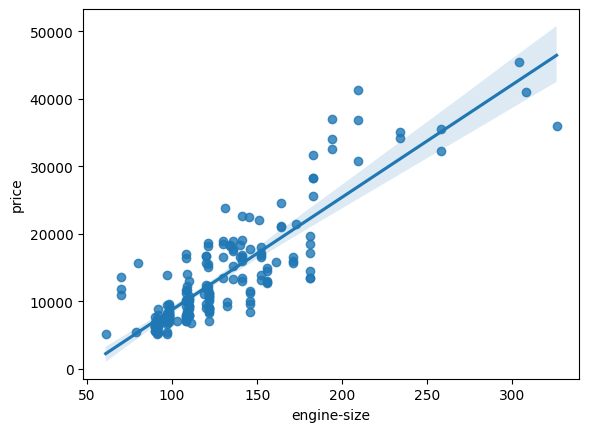

In [52]:
sns.regplot(x="engine-size",y="price",data=df3)#good predictor

In [53]:
df3[["engine-size","price"]].corr()#good predictor

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='symboling', ylabel='price'>

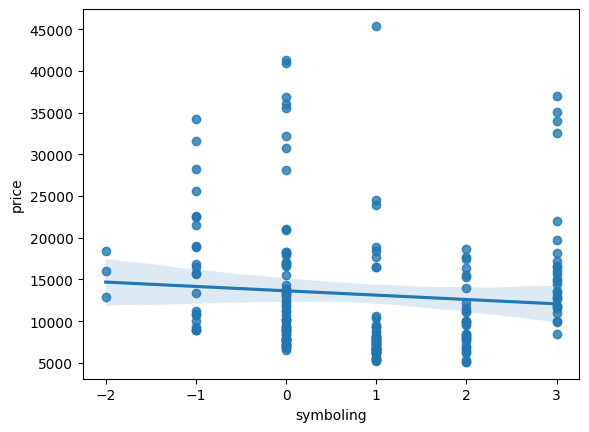

In [54]:
sns.regplot(x="symboling",y="price",data=df3)#not good predictor

In [55]:
df3[["symboling","price"]].corr()#not good predictor

,symboling,price
symboling,1.000000,-0.082391
price,-0.082391,1.000000


<Axes: xlabel='normalized-losses', ylabel='price'>

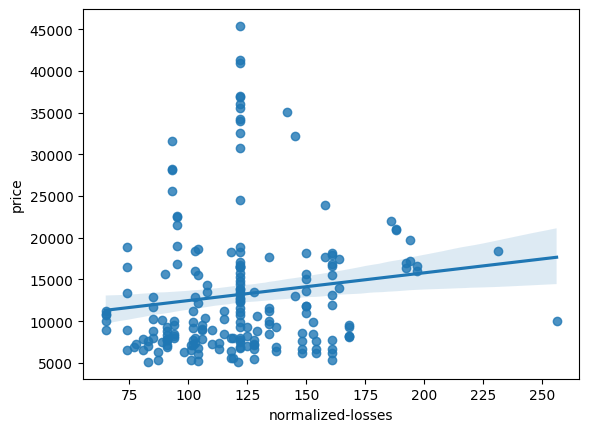

In [57]:
sns.regplot(x="normalized-losses",y="price",data=df3)#not good predictor

In [58]:
df3[["normalized-losses","price"]].corr()

,normalized-losses,price
normalized-losses,1.000000,0.133999
price,0.133999,1.000000


<Axes: xlabel='wheel-base', ylabel='price'>

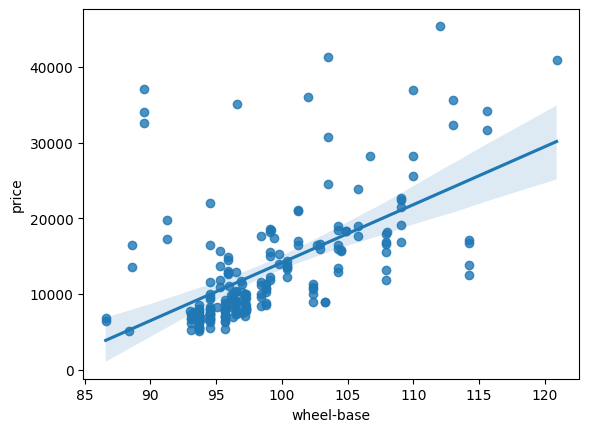

In [59]:
sns.regplot(x="wheel-base",y="price",data=df3)

In [60]:
df3[["wheel-base","price"]].corr()

,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


<Axes: xlabel='length', ylabel='price'>

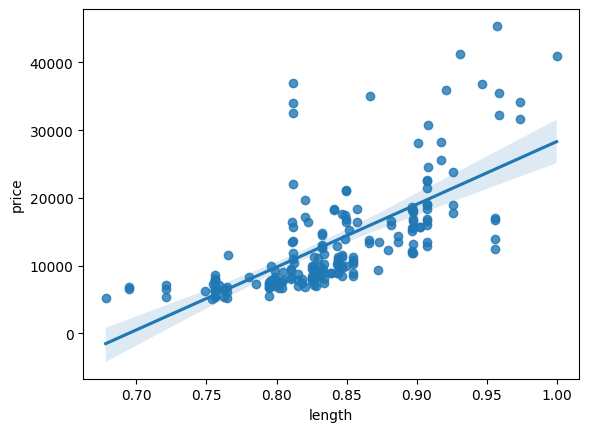

In [61]:
sns.regplot(x="length",y="price",data=df3)

In [62]:
df3[["length","price"]].corr()

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


<Axes: xlabel='width', ylabel='price'>

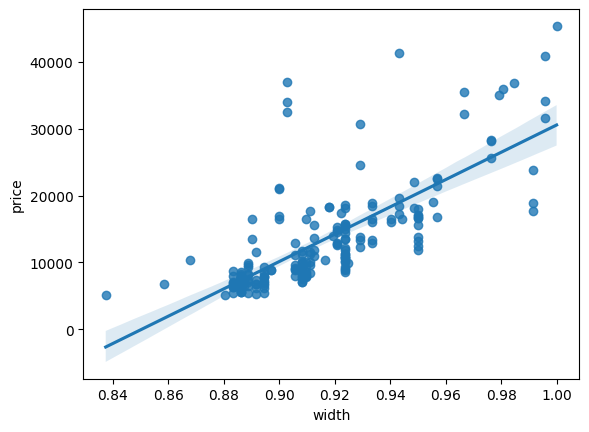

In [63]:
sns.regplot(x="width",y="price",data=df3)

In [64]:
df3[["width","price"]].corr()

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


<Axes: xlabel='height', ylabel='price'>

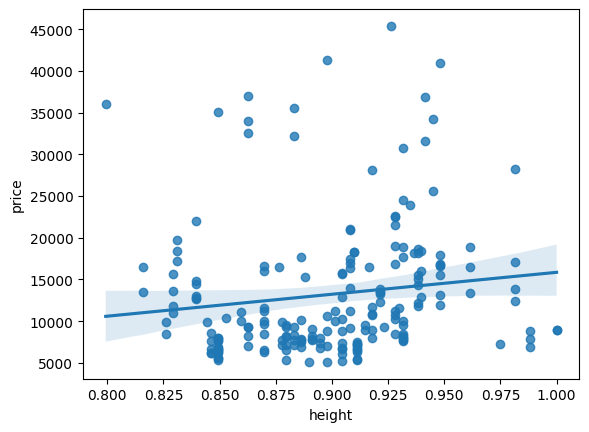

In [65]:
sns.regplot(x="height",y="price",data=df3)

In [66]:
df3[["height","price"]].corr()

,height,price
height,1.000000,0.135486
price,0.135486,1.000000


<Axes: xlabel='curb-weight', ylabel='price'>

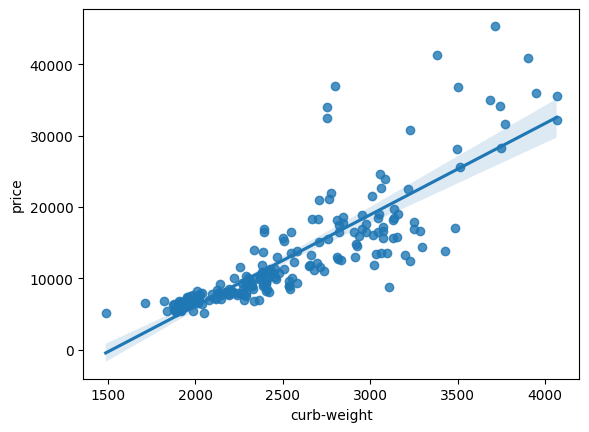

In [67]:
sns.regplot(x="curb-weight",y="price",data=df3)

In [68]:
df3[["curb-weight","price"]].corr()

,curb-weight,price
curb-weight,1.000000,0.834415
price,0.834415,1.000000


<Axes: xlabel='engine-size', ylabel='price'>

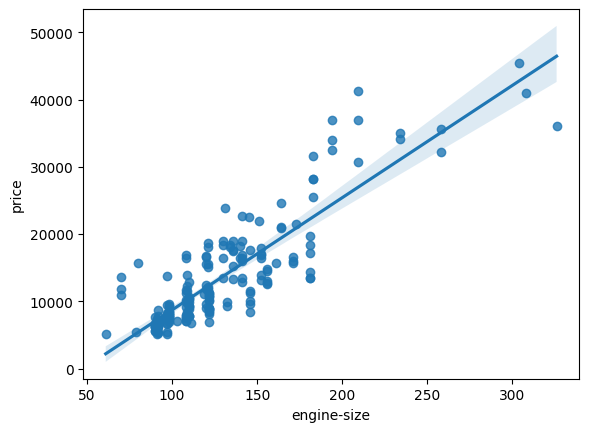

In [69]:
sns.regplot(x="engine-size",y="price",data=df3)

In [70]:
df3[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='bore', ylabel='price'>

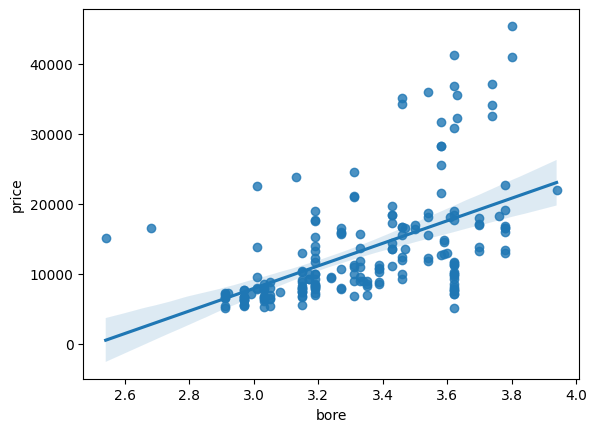

In [71]:
sns.regplot(x="bore",y="price",data=df3)

In [72]:
df3[["bore","price"]].corr()

,bore,price
bore,1.000000,0.543154
price,0.543154,1.000000


In [83]:
#stroke	compression-ratio	horsepower	peak-rpm	city-L/100	highway-L/100	

<Axes: xlabel='stroke', ylabel='price'>

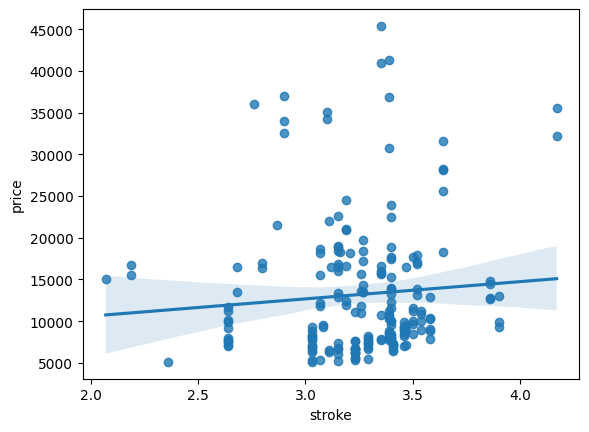

In [73]:
sns.regplot(x="stroke",y="price",data=df3)

In [74]:
df3[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


<Axes: xlabel='compression-ratio', ylabel='price'>

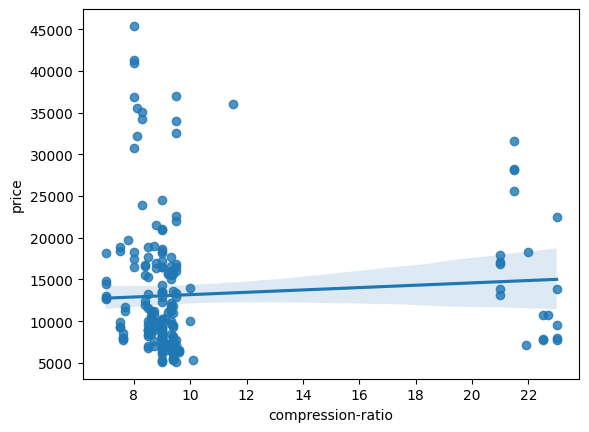

In [75]:
sns.regplot(x="compression-ratio",y="price",data=df3)

In [87]:
df3[["compression-ratio","price"]].corr()

,compression-ratio,price
compression-ratio,1.000000,0.071107
price,0.071107,1.000000


<Axes: xlabel='horsepower', ylabel='price'>

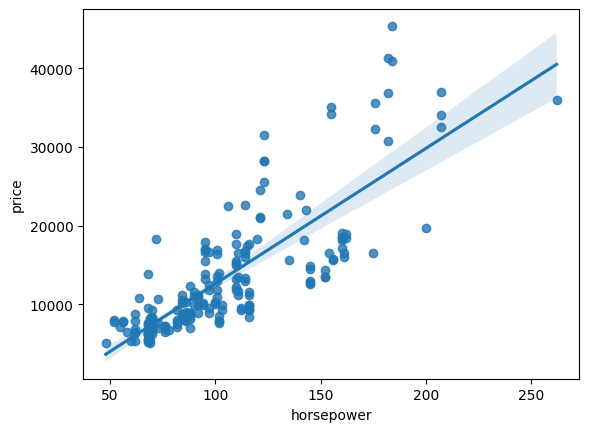

In [88]:
sns.regplot(x="horsepower",y="price",data=df3)

In [76]:
df3[["horsepower","price"]].corr()

,horsepower,price
horsepower,1.000000,0.809681
price,0.809681,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

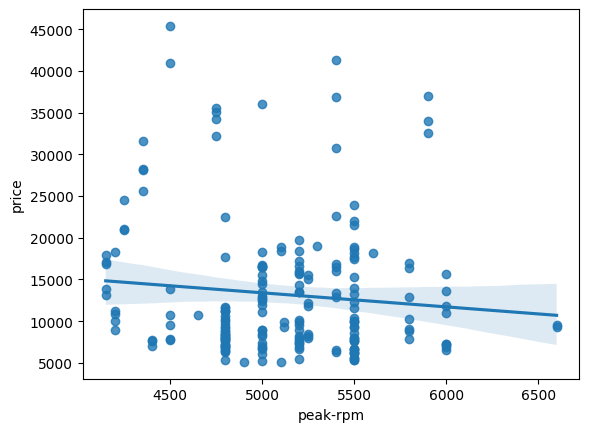

In [77]:
sns.regplot(x="peak-rpm",y="price",data=df3)

In [91]:
df3[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


<Axes: xlabel='city-L/100', ylabel='price'>

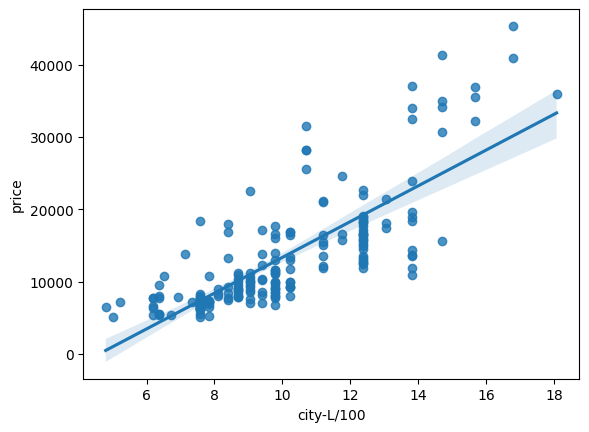

In [92]:
sns.regplot(x="city-L/100",y="price",data=df3)

In [93]:
df3[["city-L/100","price"]].corr()

,city-L/100,price
city-L/100,1.000000,0.789898
price,0.789898,1.000000


<Axes: xlabel='highway-L/100', ylabel='price'>

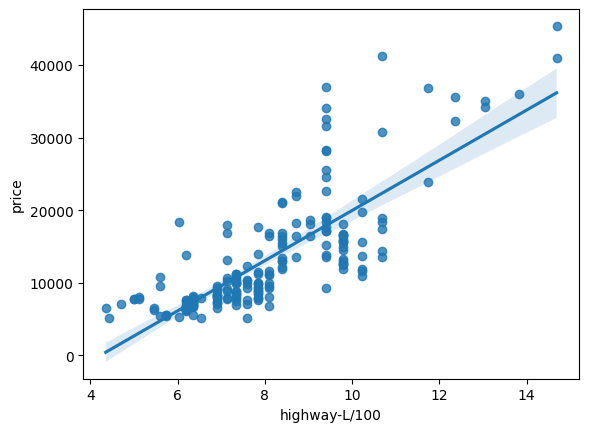

In [78]:
sns.regplot(x="highway-L/100",y="price",data=df3)

In [95]:
df3[["highway-L/100","price"]].corr()

,highway-L/100,price
highway-L/100,1.000000,0.801118
price,0.801118,1.000000


In [98]:
df3[["bore","engine-size","curb-weight","length","stroke","compression-ratio","horsepower","peak-rpm","city-L/100","highway-L/100","price"]].corr()

,bore,engine-size,curb-weight,length,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price
bore,1.000000,0.572516,0.644041,0.608941,-0.055390,0.001250,0.566838,-0.267338,0.554726,0.559197,0.543154
engine-size,0.572516,1.000000,0.849072,0.685025,0.205806,0.028889,0.822649,-0.256753,0.745059,0.783465,0.872335
curb-weight,0.644041,0.849072,1.000000,0.880665,0.167412,0.156433,0.757994,-0.279350,0.785353,0.836921,0.834415
length,0.608941,0.685025,0.880665,1.000000,0.123913,0.159733,0.579731,-0.286035,0.657373,0.707108,0.690628
stroke,-0.055390,0.205806,0.167412,0.123913,1.000000,0.187854,0.097815,-0.063720,0.036285,0.047199,0.082267
compression-ratio,0.001250,0.028889,0.156433,0.159733,0.187854,1.000000,-0.214431,-0.435721,-0.299372,-0.223361,0.071107
horsepower,0.566838,0.822649,0.757994,0.579731,0.097815,-0.214431,1.000000,0.107882,0.889466,0.840668,0.809681
peak-rpm,-0.267338,-0.256753,-0.279350,-0.286035,-0.063720,-0.435721,0.107882,1.000000,0.115813,0.017736,-0.101542
city-L/100,0.554726,0.745059,0.785353,0.657373,0.036285,-0.299372,0.889466,0.115813,1.000000,0.958306,0.789898
highway-L/100,0.559197,0.783465,0.836921,0.707108,0.047199,-0.223361,0.840668,0.017736,0.958306,1.000000,0.801118


In [99]:
df3.to_csv("automobile_price_prediction.csv",index=False)

In [100]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


# Box Plot

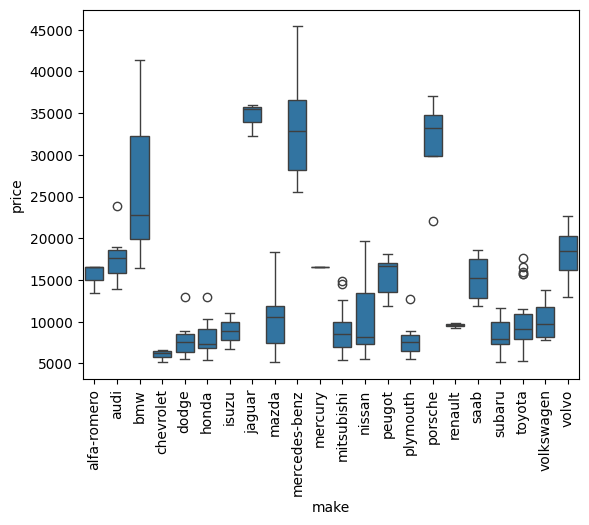

In [101]:
sns.boxplot(x="make",y="price",data=df3)
plt.xticks(rotation=90)
plt.show()

In [102]:
df3["make"].value_counts().to_frame()

,count
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugot,11


<Axes: xlabel='fuel-type', ylabel='price'>

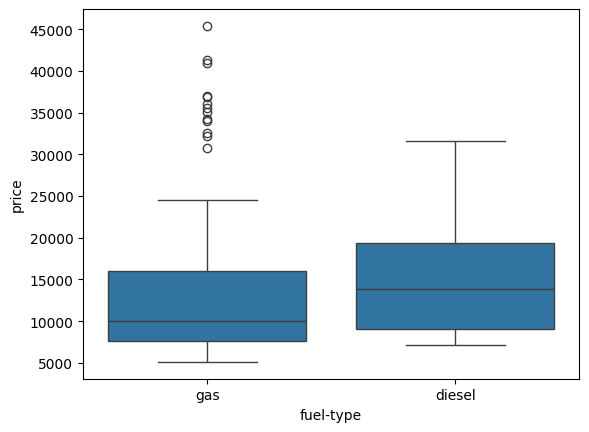

In [103]:
sns.boxplot(x="fuel-type",y="price",data=df3)

In [104]:
df3["fuel-type"].value_counts().to_frame()

,count
fuel-type,
gas,181
diesel,20


<Axes: xlabel='aspiration', ylabel='price'>

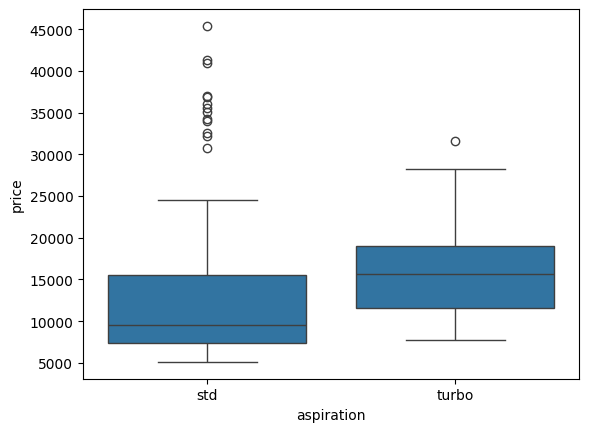

In [105]:
sns.boxplot(x="aspiration",y="price",data=df3)

<Axes: xlabel='num-of-doors', ylabel='price'>

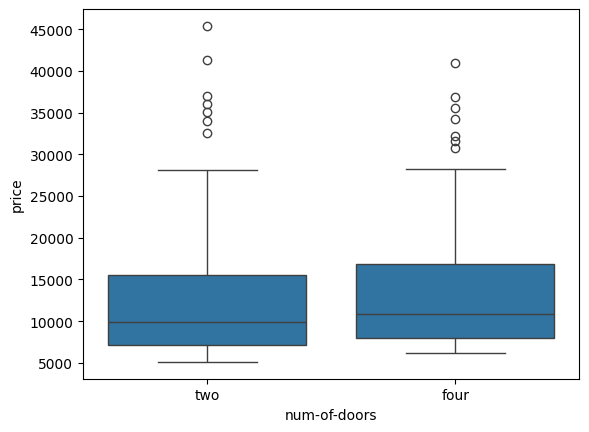

In [106]:
sns.boxplot(x="num-of-doors",y="price",data=df3)

<Axes: xlabel='body-style', ylabel='price'>

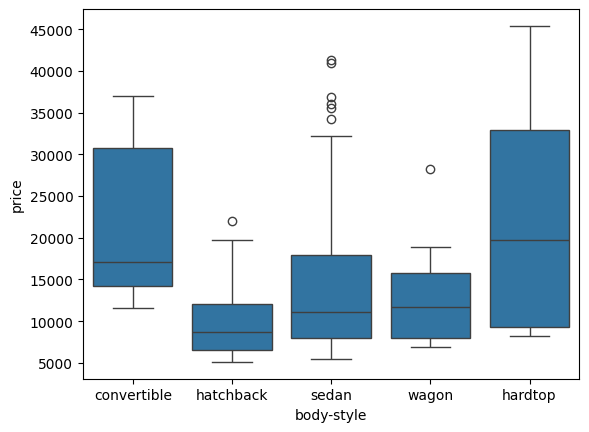

In [107]:
sns.boxplot(x="body-style",y="price",data=df3)

<Axes: xlabel='drive-wheels', ylabel='price'>

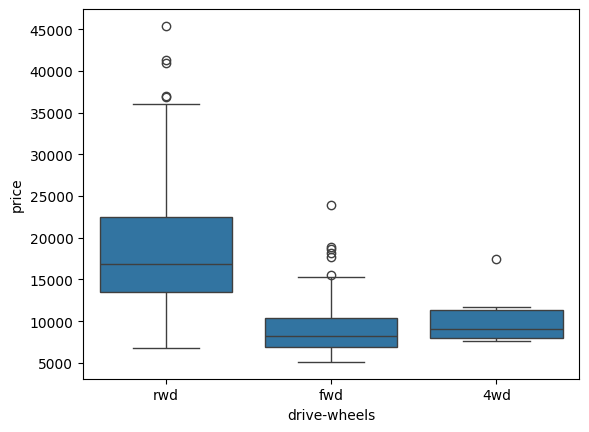

In [108]:
sns.boxplot(x="drive-wheels",y="price",data=df3)

In [109]:
df3["drive-wheels"].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


<Axes: xlabel='engine-location', ylabel='price'>

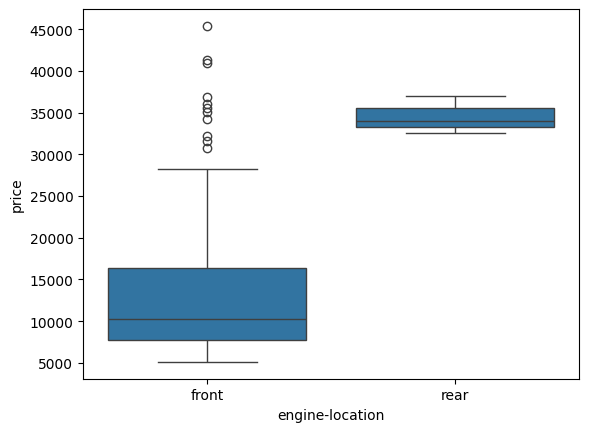

In [110]:
sns.boxplot(x="engine-location",y="price",data=df3)

In [111]:
df3["engine-location"].value_counts().to_frame()

,count
engine-location,
front,198
rear,3


<Axes: xlabel='fuel-system', ylabel='price'>

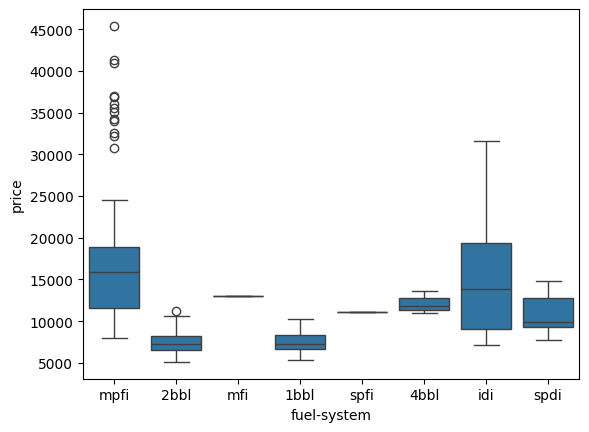

In [112]:
sns.boxplot(x="fuel-system",y="price",data=df3)

In [115]:
df3.loc[0:5,"wheel-base":"fuel-system"]

,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system
0,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi
1,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi
2,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi
3,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi
4,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi
5,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi


In [81]:
df3[["engine-type"]].value_counts().to_frame()

,count
engine-type,
ohc,145
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4


In [118]:
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-L/100           float64
highway-L/100        float64
price                float64
dtype: object

 # Price Analysis Using GroupBy

In [120]:
df_test=df3[["num-of-doors","body-style","price"]]
df_groupby=df_test.groupby(["num-of-doors","body-style"],as_index=False).mean()
df_groupby

,num-of-doors,body-style,price
0,four,hatchback,8372.000000
1,four,sedan,14490.687500
2,four,wagon,12371.960000
3,two,convertible,21890.500000
4,two,hardtop,22208.500000
5,two,hatchback,10230.793103
6,two,sedan,14283.000000


In [121]:
df_pivot= df_groupby.pivot(index="num-of-doors",columns="body-style")
df_pivot

price                                             
body-style   convertible  hardtop     hatchback       sedan     wagon
num-of-doors                                                         
four                 NaN      NaN   8372.000000  14490.6875  12371.96
two              21890.5  22208.5  10230.793103  14283.0000       NaN

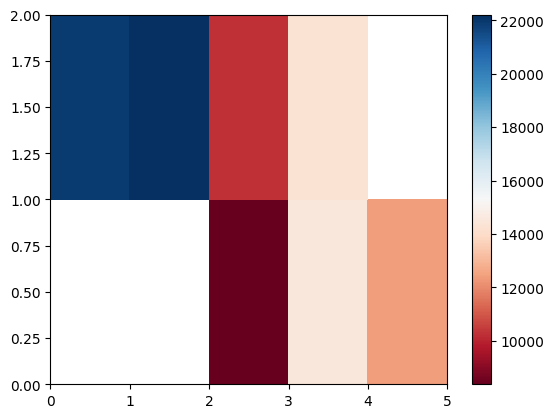

In [122]:
plt.pcolor(df_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

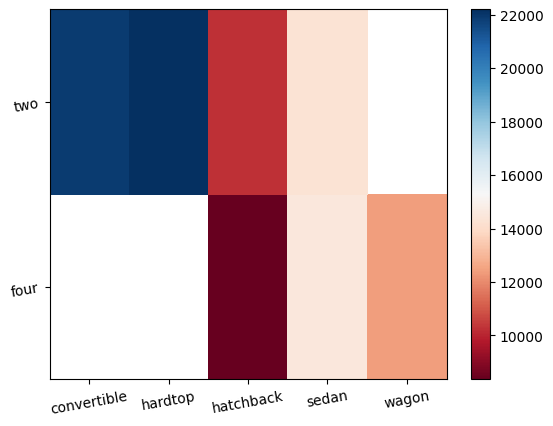

In [123]:
fig, ax=plt.subplots()
img = ax.pcolor(df_pivot,cmap="RdBu")

x_label=df_pivot.columns.levels[1]
y_label=df_pivot.index

ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(x_label, minor=False)
ax.set_yticklabels(y_label, minor=False)

plt.xticks(rotation=10)
plt.yticks(rotation=10)

fig.colorbar(img)
plt.show()


In [124]:
df_test1=df3[["drive-wheels","engine-location","price"]]
df_group1=df_test1.groupby(["drive-wheels","engine-location"],as_index=False).mean()
df_group1

,drive-wheels,engine-location,price
0,4wd,front,10241.000000
1,fwd,front,9244.779661
2,rwd,front,19142.180556
3,rwd,rear,34528.000000


In [125]:
df1_pivot=df_group1.pivot(index="drive-wheels",columns="engine-location")
df1_pivot

price         
engine-location         front     rear
drive-wheels                          
4wd              10241.000000      NaN
fwd               9244.779661      NaN
rwd              19142.180556  34528.0

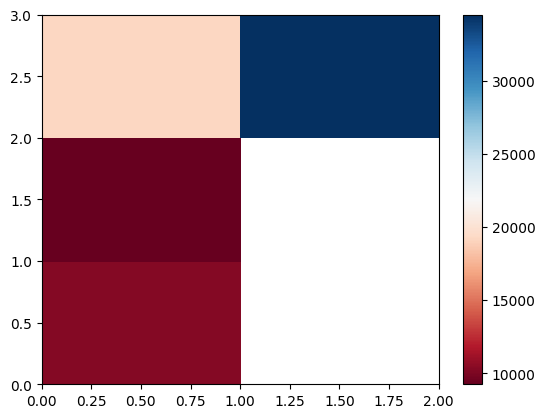

In [126]:
plt.pcolor(df1_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

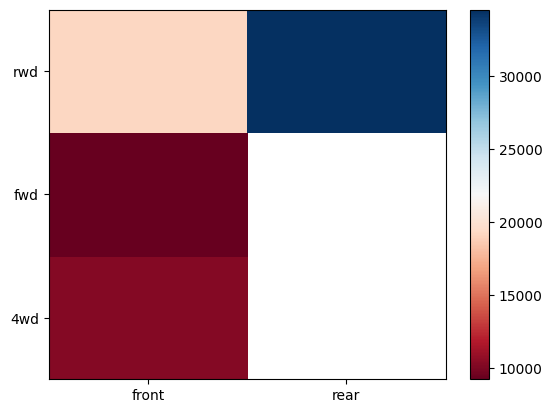

In [127]:
fig, ax=plt.subplots()
img = ax.pcolor(df1_pivot,cmap="RdBu")

x_label=df1_pivot.columns.levels[1]
y_label=df1_pivot.index

ax.set_xticks(np.arange(df1_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df1_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(x_label, minor=False)
ax.set_yticklabels(y_label, minor=False)

plt.xticks(rotation=0)
plt.yticks(rotation=0)

fig.colorbar(img)
plt.show()


In [156]:
pearson_coef, p_value = stats.pearsonr(df3["symboling"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: -0.08239118716962357 P_value is: 0.24491487657164698


In [128]:
#df_pivot=df_group.pivot(index="fuel-type",columns="drive-wheels")	

In [160]:
pearson_coef,p_value = stats.pearsonr(df3["normalized-losses"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: 0.1339987342927434 P_value is: 0.0578974935270312


In [162]:
pearson_coef,p_value = stats.pearsonr(df3["curb-weight"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: 0.8344145257702845 P_value is: 2.189577238893924e-53


In [163]:
pearson_coef,p_value = stats.pearsonr(df3["engine-size"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: 0.8723351674455185 P_value is: 9.26549162219869e-64


In [164]:
pearson_coef,p_value = stats.pearsonr(df3["horsepower"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: 0.8096811975632285 P_value is: 6.058444649710644e-48


In [168]:
pearson_coef,p_value = stats.pearsonr(df3["stroke"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: 0.08226709992212351 P_value is: 0.24562872821142684


In [167]:
pearson_coef,p_value = stats.pearsonr(df3["city-L/100"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: 0.7898975136626943 P_value is: 3.9031064009395423e-44


In [170]:
pearson_coef,p_value = stats.pearsonr(df3["highway-L/100"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: 0.8011176263981976 P_value is: 3.046784581041069e-46


In [172]:
pearson_coef,p_value = stats.pearsonr(df3["peak-rpm"],df3["price"])
print("Pearson Correlation Coefficient is:",pearson_coef,"P_value is:",p_value)

Pearson Correlation Coefficient is: -0.10154203145050206 P_value is: 0.1514757570743025


In [130]:
df3.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100,highway-L/100,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.400000,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.400000,17710.0
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.400000,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,13.823529,11.750000,23875.0
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,10.217391,8.103448,16430.0


In [131]:
df3.loc[0:5,"wheel-base":"fuel-system"]

,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system
0,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi
1,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi
2,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi
3,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi
4,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi
5,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi


In [151]:
df_test=df3[["make","engine-size","horsepower","num-of-doors","body-style","curb-weight","drive-wheels","engine-location","city-L/100","highway-L/100","price"]]
df_groupby=df_test.groupby(["make","engine-size","horsepower","num-of-doors","body-style","curb-weight","drive-wheels","engine-location","city-L/100","highway-L/100"],as_index=False).mean()
df_groupby.head(50)

,make,engine-size,horsepower,num-of-doors,body-style,curb-weight,drive-wheels,engine-location,city-L/100,highway-L/100,price
0,alfa-romero,130,111.0,two,convertible,2548,rwd,front,11.190476,8.703704,14997.5
1,alfa-romero,152,154.0,two,hatchback,2823,rwd,front,12.368421,9.038462,16500.0
2,audi,109,102.0,four,sedan,2337,fwd,front,9.791667,7.833333,13950.0
3,audi,131,140.0,four,sedan,3086,fwd,front,13.823529,11.750000,23875.0
4,audi,136,110.0,four,sedan,2844,fwd,front,12.368421,9.400000,17710.0
5,audi,136,110.0,four,wagon,2954,fwd,front,12.368421,9.400000,18920.0
6,audi,136,110.0,two,sedan,2507,fwd,front,12.368421,9.400000,15250.0
7,audi,136,115.0,four,sedan,2824,4wd,front,13.055556,10.681818,17450.0
8,bmw,108,101.0,four,sedan,2395,rwd,front,10.217391,8.103448,16925.0
9,bmw,108,101.0,two,sedan,2395,rwd,front,10.217391,8.103448,16430.0


In [135]:
df_test=df3[["make","engine-size","horsepower","curb-weight","city-L/100","highway-L/100","price"]]
df_groupby=df_test.groupby(["make","engine-size","horsepower","curb-weight","city-L/100","highway-L/100"],as_index=False).mean()
df_groupby.head(50)

,make,engine-size,horsepower,curb-weight,city-L/100,highway-L/100,price
0,alfa-romero,130,111.0,2548,11.190476,8.703704,14997.5
1,alfa-romero,152,154.0,2823,12.368421,9.038462,16500.0
2,audi,109,102.0,2337,9.791667,7.833333,13950.0
3,audi,131,140.0,3086,13.823529,11.750000,23875.0
4,audi,136,110.0,2507,12.368421,9.400000,15250.0
5,audi,136,110.0,2844,12.368421,9.400000,17710.0
6,audi,136,110.0,2954,12.368421,9.400000,18920.0
7,audi,136,115.0,2824,13.055556,10.681818,17450.0
8,bmw,108,101.0,2395,10.217391,8.103448,16677.5
9,bmw,164,121.0,2710,11.190476,8.392857,20970.0


In [136]:
df_test=df3[["engine-size","horsepower","curb-weight","city-L/100","highway-L/100","price"]]
df_groupby=df_test.groupby(["engine-size","horsepower","curb-weight","city-L/100","highway-L/100"],as_index=False).mean()
df_groupby.head(50)

,engine-size,horsepower,curb-weight,city-L/100,highway-L/100,price
0,61,48.0,1488,5.000000,4.433962,5151.000000
1,70,101.0,2380,13.823529,10.217391,11395.000000
2,70,101.0,2385,13.823529,10.217391,13645.000000
3,79,60.0,1837,6.184211,5.595238,5399.000000
4,80,135.0,2500,14.687500,10.217391,15645.000000
5,90,68.0,1876,6.351351,5.731707,5572.000000
6,90,68.0,1876,7.580645,6.184211,6377.000000
7,90,68.0,1918,6.351351,5.731707,5572.000000
8,90,68.0,1967,7.580645,6.184211,6229.000000
9,90,68.0,1989,7.580645,6.184211,6997.666667


In [137]:
"num-of-doors","body-style","drive-wheels","engine-location",

('num-of-doors', 'body-style', 'drive-wheels', 'engine-location')

In [138]:
"engine-size","horsepower","curb-weight","city-L/100","highway-L/100"

('engine-size', 'horsepower', 'curb-weight', 'city-L/100', 'highway-L/100')

In [139]:
df_test=df3[["engine-size","horsepower","price"]]
df_groupby=df_test.groupby(["engine-size","horsepower"],as_index=False).mean()
df_groupby.head(50)

,engine-size,horsepower,price
0,61,48.000000,5151.000000
1,70,101.000000,12145.000000
2,79,60.000000,5399.000000
3,80,135.000000,15645.000000
4,90,68.000000,6371.500000
5,90,70.000000,6435.000000
6,91,68.000000,6435.000000
7,92,58.000000,6479.000000
8,92,62.000000,6961.333333
9,92,68.000000,6082.333333


In [142]:
df_groupby.head()

,engine-size,horsepower,price
0,61,48.0,5151.0
1,70,101.0,12145.0
2,79,60.0,5399.0
3,80,135.0,15645.0
4,90,68.0,6371.5


In [147]:
df_group1=df3[["engine-size","num-of-doors","horsepower","curb-weight","city-L/100","highway-L/100","body-style","drive-wheels","engine-location","price"]]
groupby=df_group1.groupby(["engine-size","num-of-doors","horsepower","curb-weight","city-L/100","highway-L/100","body-style","drive-wheels","engine-location"],as_index=False).mean()
groupby

,engine-size,num-of-doors,horsepower,curb-weight,city-L/100,highway-L/100,body-style,drive-wheels,engine-location,price
0,61,two,48.0,1488,5.000000,4.433962,hatchback,fwd,front,5151.0
1,70,two,101.0,2380,13.823529,10.217391,hatchback,rwd,front,11395.0
2,70,two,101.0,2385,13.823529,10.217391,hatchback,rwd,front,13645.0
3,79,two,60.0,1837,6.184211,5.595238,hatchback,fwd,front,5399.0
4,80,two,135.0,2500,14.687500,10.217391,hatchback,rwd,front,15645.0
...,...,...,...,...,...,...,...,...,...,...
183,234,two,155.0,3685,14.687500,13.055556,convertible,rwd,front,35056.0
184,258,four,176.0,4066,15.666667,12.368421,sedan,rwd,front,33900.0
185,304,two,184.0,3715,16.785714,14.687500,hardtop,rwd,front,45400.0
186,308,four,184.0,3900,16.785714,14.687500,sedan,rwd,front,40960.0
